In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mikeio import Dfs0, Dataset

C:\Users\rwjc\AppData\Local\Programs\Python\Python39\lib\site-packages\pyextremes\eva.py:111: RuntimeWarning: 21,242 Null values found in `data` - removing invalid entries
  warnings.warn(message=message, category=RuntimeWarning)


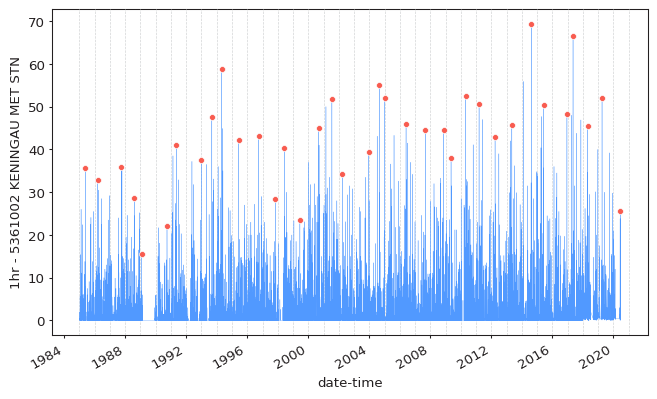

In [4]:
#Import data from DFS0
df = Dfs0("C:/Projects/Side_Projects/Monte_Carlo/Script/Input/5361002 KENINGAU MET STN.dfs0").to_dataframe()

#Convert Pandas dataframe to Padas Series
series=df.squeeze()

#Create EVA model
from pyextremes import EVA
model=EVA(series)

#Extract extreme values
model.get_extremes(method="BM", block_size="365.2425D")

fig1 = model.plot_extremes()
plt.savefig(r"C:/Projects/Side_Projects/Monte_Carlo/Script/Output/Extreme_Values.png")

In [6]:
#Model fitting
model.fit_model()

#Calculate return values
summary = model.get_summary(
    return_period=[5, 10, 25, 50, 100],
    alpha=0.95,
    n_samples=1000,
)
print(summary)

#export return values as csv
summary.to_csv(r"C:/Projects/Side_Projects/Monte_Carlo/Script/Output/Return_Period.csv", index = True)

               return value   lower ci    upper ci
return period                                     
5.0               54.171006  49.382269   58.652667
10.0              62.890376  56.787525   68.421273
25.0              73.907323  65.641694   81.085907
50.0              82.080324  71.841118   90.469470
100.0             90.192977  78.097292  100.116634


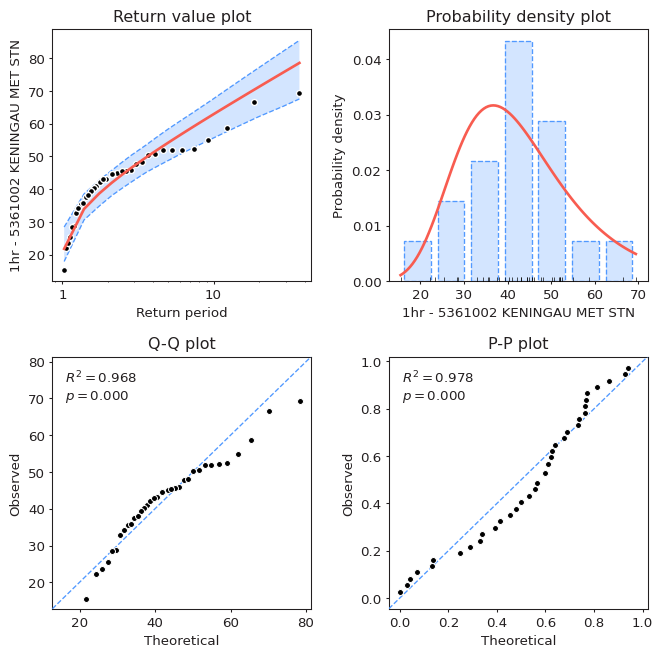

In [7]:
model.plot_diagnostic(alpha=0.95)

#export plot
plt.savefig(r"C:/Projects/Side_Projects/Monte_Carlo/Script/Output/Diagnostics.png")